<a href="https://colab.research.google.com/github/shania-mitra/PRA3500/blob/master/Poker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poker
Task: Create a deck of cards, shuffle the deck (randomize) and then draw 5 cards.
Create a check to see if you have any hands of cards which would satisfy the
criteria in the standard rules of poker.
Repeat the task sufficient times to generate statistics. Does your model follow the
expected pattern?

As can be seen from the graph generated by the code, the order of highest to lowest occurences is:

One Pair (P = 0.414), 
Three of a kind(P = 0.244), 
No Special Hand (0.128), 
Two Pairs (0.092), 
Four of a Kind (0.086), 
Full House (0.034) , 
Straight (0.002), 
Flush/Straight Flush( P = 0.00 & P = 0.00).

This deviates from the expected order of probabilities, highest to lowest:

No pair,
One Pair,
Two Pair,
Three of a Kind,
Straight,
Flush,
Full House,
Four of a Kind,
Straight Flush,
Royal Flush,




['1C', '2C', '3C', '4C', '5C', '6C', '7C', '8C', '9C', '10C', '11C', '12C', '13C', '14C', '1H', '2H', '3H', '4H', '5H', '6H', '7H', '8H', '9H', '10H', '11H', '12H', '13H', '14H', '1D', '2D', '3D', '4D', '5D', '6D', '7D', '8D', '9D', '10D', '11D', '12D', '13D', '14D', '1S', '2S', '3S', '4S', '5S', '6S', '7S', '8S', '9S', '10S', '11S', '12S', '13S', '14S']
Three of a Kind!
One Pair!
One Pair!
One Pair!
One Pair!
One Pair!
Two Pairs!
Four of a kind!
Three of a Kind!
Three of a Kind!
Three of a Kind!
Three of a Kind!
 No Special Hand! 
 No Special Hand! 
One Pair!
Three of a Kind!
One Pair!
One Pair!
Four of a kind!
Three of a Kind!
 No Special Hand! 
One Pair!
Three of a Kind!
Straight!
One Pair!
One Pair!
Three of a Kind!
Three of a Kind!
Three of a Kind!
One Pair!
One Pair!
One Pair!
One Pair!
One Pair!
Three of a Kind!
One Pair!
One Pair!
Four of a kind!
One Pair!
One Pair!
Three of a Kind!
One Pair!
Three of a Kind!
One Pair!
 No Special Hand! 
One Pair!
One Pair!
 No Special Hand! 
F

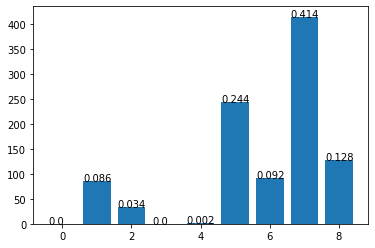

In [0]:
import random
import matplotlib
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

values = ["1" , "2", "3", "4", "5" , "6", "7", "8", "9", "10", "11", "12", "13", "14"]
#values = {"2":2, "3":3, "4":4, "5":5, "6":6, "7":7, "8":8, "9":9, "10":10, "J":11, "Q":12, "K":13, "A":14}
num_of_Sim = 10000
string_club = "C"
string_hearts = "H"
string_diamonds = "D"
string_spades = "S"
Clubs = [i + string_club for i in values]
Hearts = [i + string_hearts for i in values]
Diamonds = [i + string_diamonds for i in values]
Spades = [i + string_spades for i in values]

deck = Clubs + Hearts + Diamonds + Spades

print(deck)

#deck_shuffled = random.sample(deck, len(deck)) 
#print (deck_shuffled)



#https://briancaffey.github.io/2018/01/02/checking-poker-hands-with-python.html
def check_flush(hand):
    suits = [h[1] for h in hand]
    if len(set(suits)) == 1:
      return True
    else:
      return False

def check_straight_flush(hand):
    if check_flush(hand) and check_straight(hand):
        return True
    else:
        return False

def check_four_of_a_kind(hand):
    values = [i[0] for i in hand]
    value_counts = defaultdict(lambda:0)
    for v in values: 
        value_counts[v]+=1
    if sorted(value_counts.values()) == [1,4]:
        return True
    return False

def check_full_house(hand):
    values = [i[0] for i in hand]
    value_counts = defaultdict(lambda:0)
    for v in values: 
        value_counts[v]+=1
    if sorted(value_counts.values()) == [2,3]:
        return True
    return False

# def check_straight(hand):
#     values = [i[0] for i in hand]
#     value_counts = defaultdict(lambda:0)
#     for v in values:
#         value_counts[v] += 1
#     rank_values = [values[int(i)] for i in values]
#     value_range = max(rank_values) - min(rank_values)
#     if len(set(value_counts.values())) == 1 and (value_range==4):
#         return True
#     else: 
#         #check straight with low Ace
#         if set(values) == set(["A", "2", "3", "4", "5"]):
#             return True
#         return False
def check_straight(hand):
  values = [int(i[0]) for i in hand]
  # sort by size
  sorted_values = np.sort(np.array(values)).tolist()
  # check that first and last value are 4 apart (1,2,3,4,5 --> 5-1=4)
  if sorted_values[-1] == sorted_values[0]+len(sorted_values)-1:
    # check there are no duplicates (e.g. 1,2,2,4,5 --> 5-1=4 but 2 is duplicate)
    if len(set([x for x in sorted_values if sorted_values.count(x) > 1]))==0:
      return True
  return False

def check_three_of_a_kind(hand):
    values = [i[0] for i in hand]
    value_counts = defaultdict(lambda:0)
    for v in values:
        value_counts[v]+=1
    if set(value_counts.values()) == set([3,1]):
        return True
    else:
        return False

def check_two_pairs(hand):
    values = [i[0] for i in hand]
    value_counts = defaultdict(lambda:0)
    for v in values:
        value_counts[v]+=1
    if sorted(value_counts.values())==[1,2,2]:
        return True
    else:
        return False

def check_one_pairs(hand):
    values = [i[0] for i in hand]
    value_counts = defaultdict(lambda:0)
    for v in values:
        value_counts[v]+=1
    if 2 in value_counts.values():
        return True
    else:
        return False


def checkHand(hand):

    

    i = 0
    for i in range(10):
        if check_straight_flush(hand) is True:
            print ("Straight Flush!")
            return 0
        if check_four_of_a_kind(hand) is True:  
            print ("Four of a kind!") 
            return 1
        if check_full_house(hand) is True:
            print ("Full House")
            return 2
        if check_flush(hand) is True:
            print ("Flush")
            return 3
        if check_straight(hand) is True:
            print ("Straight!")
            return 4
        if check_three_of_a_kind(hand) is True:
            print ("Three of a Kind!")
            return 5
        if check_two_pairs(hand) is True :
            print ("Two Pairs!")
            return 6
        if check_one_pairs(hand) is True :
            print ("One Pair!")
            return 7
        else: 
            print (" No Special Hand! ")
            return 8  
    i += 1

#create array     
hand_array = np.zeros(9) 

#deck_shuffled = random.sample(deck, len(deck))
#hand_random = []   
#for x in range(5):
   #hand_random.append(deck_shuffled[x]) 
   #print("Hand is:" , hand_random)


    
#for each simulation, add 1 count of returned value to corresponding field in hand_array
for i in range(1000):
  hand_array[checkHand(random.sample(deck,5))] += 1
  
bars = plt.bar(np.arange(9), hand_array, label='Frequency of Hand')

for bar in bars:
    yval = bar.get_height()
    #label top of bar with probability of occurence
    plt.text(bar.get_x(), yval + .005, (yval/1000))
 
